In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

In [2]:
!pip install statsmodels

In [89]:
df = sm.datasets.fair.load_pandas().data

In [90]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [91]:
df[df['affairs']==0]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
2053,4.0,32.0,9.0,2.0,3.0,14.0,2.0,4.0,0.0
2054,4.0,27.0,6.0,0.0,2.0,14.0,3.0,4.0,0.0
2055,4.0,22.0,2.5,0.0,2.0,14.0,3.0,2.0,0.0
2056,5.0,42.0,23.0,4.0,3.0,16.0,3.0,5.0,0.0
2057,5.0,27.0,2.5,1.0,3.0,20.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0


In [92]:
df.shape

(6366, 9)

In [93]:
df['affairs']=(df.affairs>0.5).astype(int)

In [94]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 422.9 KB


<AxesSubplot:>

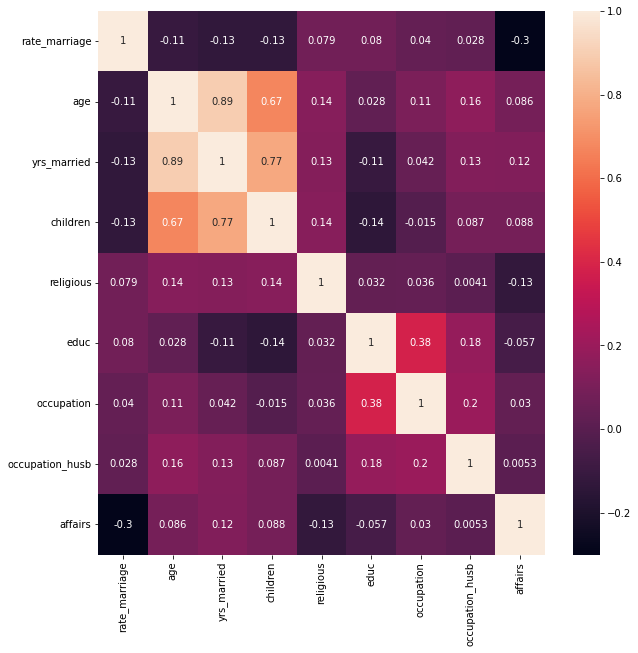

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [97]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [98]:
y,X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',df,return_type="dataframe")

In [99]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [100]:
X = X.rename(columns =
{"C(occupation)[T.2.0]":"occ_2",
"C(occupation)[T.3.0]":"occ_3",
"C(occupation)[T.4.0]":"occ_4",
"C(occupation)[T.5.0]":"occ_5",
"C(occupation)[T.6.0]":"occ_6",
"C(occupation_husb)[T.2.0]":"occ_husb_2",
"C(occupation_husb)[T.3.0]":"occ_husb_3",

"C(occupation_husb)[T.4.0]":"occ_husb_4",
"C(occupation_husb)[T.5.0]":"occ_husb_5",
"C(occupation_husb)[T.6.0]":"occ_husb_6"})

In [101]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [102]:
y = np.ravel(y)

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [104]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.tree import ExtraTreeRegressor

In [105]:
fea_sel = SelectFromModel(Lasso(alpha=0.01))
s1 = fea_sel.fit(X,y)
l = list(X.columns[(s1.get_support())])

In [106]:
l

['rate_marriage', 'age', 'yrs_married', 'religious', 'educ']

In [107]:
fea_sel = SelectFromModel(ExtraTreeClassifier())
s1 = fea_sel.fit(X,y)
l1 = list(X.columns[(s1.get_support())])
l1

['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ']

In [108]:
fea_sel = SelectFromModel(ExtraTreeRegressor())
s1 = fea_sel.fit(X,y)
l2 = list(X.columns[(s1.get_support())])
l2

['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ']

In [109]:
X_train = X_train[l1]
X_test=X_test[l1]

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
regression = LogisticRegression()

params ={'penalty':['l1','l2','elasticnet'],'C':[1e+10,1e+5,1e+2,1,5,10,15,20,25,30,40,50],'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
reg_class = GridSearchCV(regression,params,scoring='accuracy',cv=5)
reg_class.fit(X_train,y_train)


C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.con

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.con

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.con

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\vijit kumar\.con

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_mode

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10000000000.0, 100000.0, 100.0, 1, 5, 10, 15, 20,
                               25, 30, 40, 50],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [111]:
pred = reg_class.predict(X_test)
accuracy_score(y_test,pred)

0.7543171114599686

In [112]:
confusion_matrix(y_test,pred)

array([[903,  43],
       [270,  58]], dtype=int64)

In [113]:
import pickle
pickle.dump(reg_class,open('affair1.pkl','wb'))

In [114]:
model = pickle.load(open('affair1.pkl','rb'))

In [115]:
d = {
    "rate_marriage":3.0,
    "age":32.0,
    "yrs_married":9,
    "children":3.0,
    "religious":3.0,
    "educ":17.0
}

In [116]:
X[l1]

,rate_marriage,age,yrs_married,children,religious,educ
0,3.0,32.0,9.0,3.0,3.0,17.0
1,3.0,27.0,13.0,3.0,1.0,14.0
2,4.0,22.0,2.5,0.0,1.0,16.0
3,4.0,37.0,16.5,4.0,3.0,16.0
4,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0
6362,4.0,32.0,13.0,1.0,1.0,16.0
6363,5.0,22.0,2.5,0.0,2.0,14.0
6364,5.0,32.0,6.0,1.0,3.0,14.0


In [117]:
s = list(d.values())

In [118]:
model.predict([s])

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])